# Van Kampen 1.7. The central limit theorem(CLT)

특정 process를 매번 반복할 때, 이것이 일어나는 확률 분포 함수가 매번 같은 경우에 대해서,

average와 variance가 finite한 경우라면,

이를 매우 여러번 반복하게 되면,

이것이 gaussian distribution function을 따르게 된다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def coin(n):
    result = np.round(np.random.rand(n),0)
    return result

print(coin(10))

[1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]


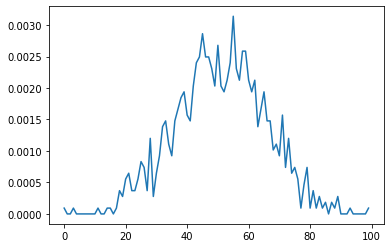

In [3]:
def Y(n,r,bin_num):
    value = np.zeros(n)
    
#     for i in tqdm(range(0,r)):
    for i in range(0,r):
        value += coin(n)
    
    result,bins = np.histogram(value,bins = bin_num, density = True)
    
    return result

final_position = Y(1000,100000,100)

# print(final_position)
plt.plot(final_position)


        

r value is 1000


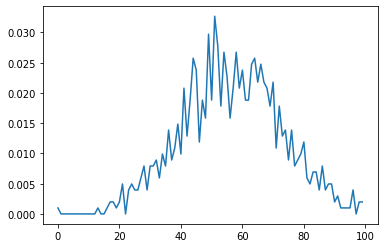

r value is 10000


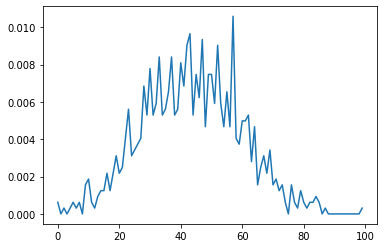

r value is 100000


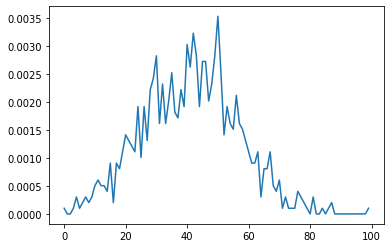

r value is 1000000


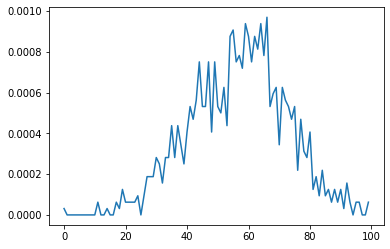

In [4]:
for i in range(3,7):
    final_position = Y(1000,10**i,100)
    plt.plot(final_position)
    print('r value is',10**i)
    plt.show()

num value is 1000


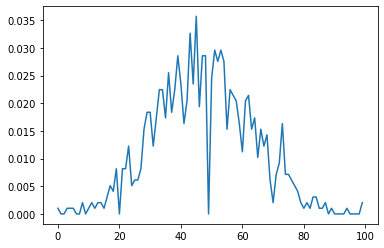

num value is 10000


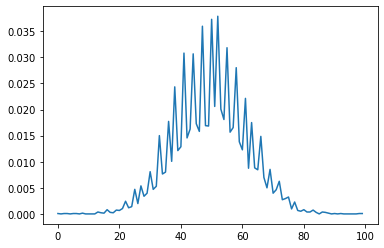

num value is 100000


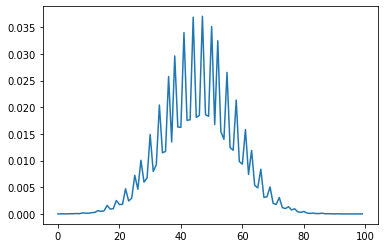

num value is 1000000


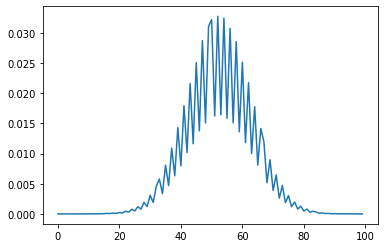

In [5]:
for i in range(3,7):
    final_position = Y(10**i,1000,100)
    plt.plot(final_position)
    print('num value is',10**i)
    plt.show()

num value is 1000


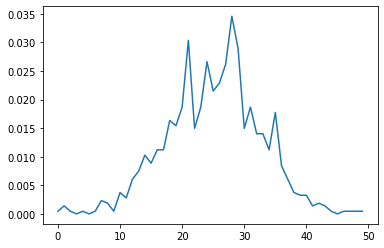

num value is 10000


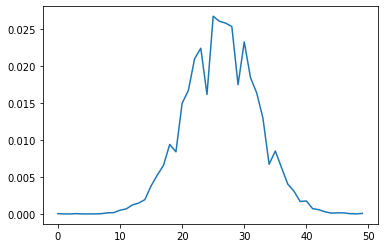

num value is 100000


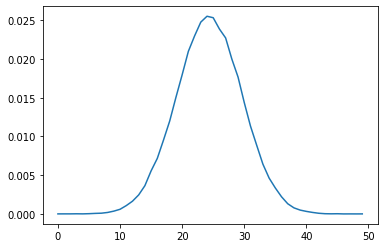

num value is 1000000


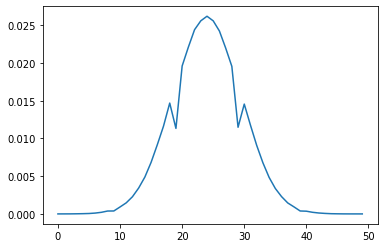

In [6]:
for i in range(3,7):
    final_position = Y(10**i,1000,50)
    plt.plot(final_position)
    print('num value is',10**i)
    plt.show()

# Coin Toss를 하는 횟수가 증가할수록, 단순히 Binomial한 경우가 점점 Gaussian에 가까워짐을 볼 수 있다.

# Fitting을 해보자

In [7]:
from scipy.optimize import curve_fit

def gauss(x,M,V,C):
    return C*np.exp(-(x-M)**2/(2*V))

In [8]:
def Y(n,r,bin_num):
    value = np.zeros(n)
    
    for i in range(0,r):

        value += coin(n)
    
    result,bins = np.histogram(value,bins = bin_num, density = True)
    
    return result, bins[:-1]

In [ ]:
y,x = Y(10**9,10000,80)

plt.plot(x,y)

In [ ]:
def gauss(x,M,V,C):
    return C*np.exp(-(x-M)**2/(V))

In [ ]:
popt, pcov = curve_fit(gauss,x,y)

print (popt)
print (pcov)

불행하게도, fitting이 되지 않는 상황이다... 하지만 Van Kampen 책의 eq (7.7)을 쓴다면, 해결이 가능하다.

In [ ]:
plt.plot(x,y,'b-')
plt.plot(x,gauss(x,500,500,np.sqrt(500*3.14)**-1),'r-')

In [ ]:
y,x = Y(10**8,10000,100)

plt.plot(x,y)

In [ ]:
plt.plot(x,y,'b-')
plt.plot(x,gauss(x,500,500,np.sqrt(500*3.14)**-1),'r-')

In [ ]:
for i in range(0,20):
    y,x = Y(100000,2**i,100)
    plt.plot(x,y)
    print('r is',2**i)
    plt.show()